In [8]:
import os 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [ ]:
dir_path = r"D:\PAPERS\DIP2\New\RadarScenes\RadarScenes\data"

<function nt.listdir(path=None)>

In [16]:
sequences_meta_data = json.load(open(os.path.join(dir_path,"sequences.json")))

# Analysing Images

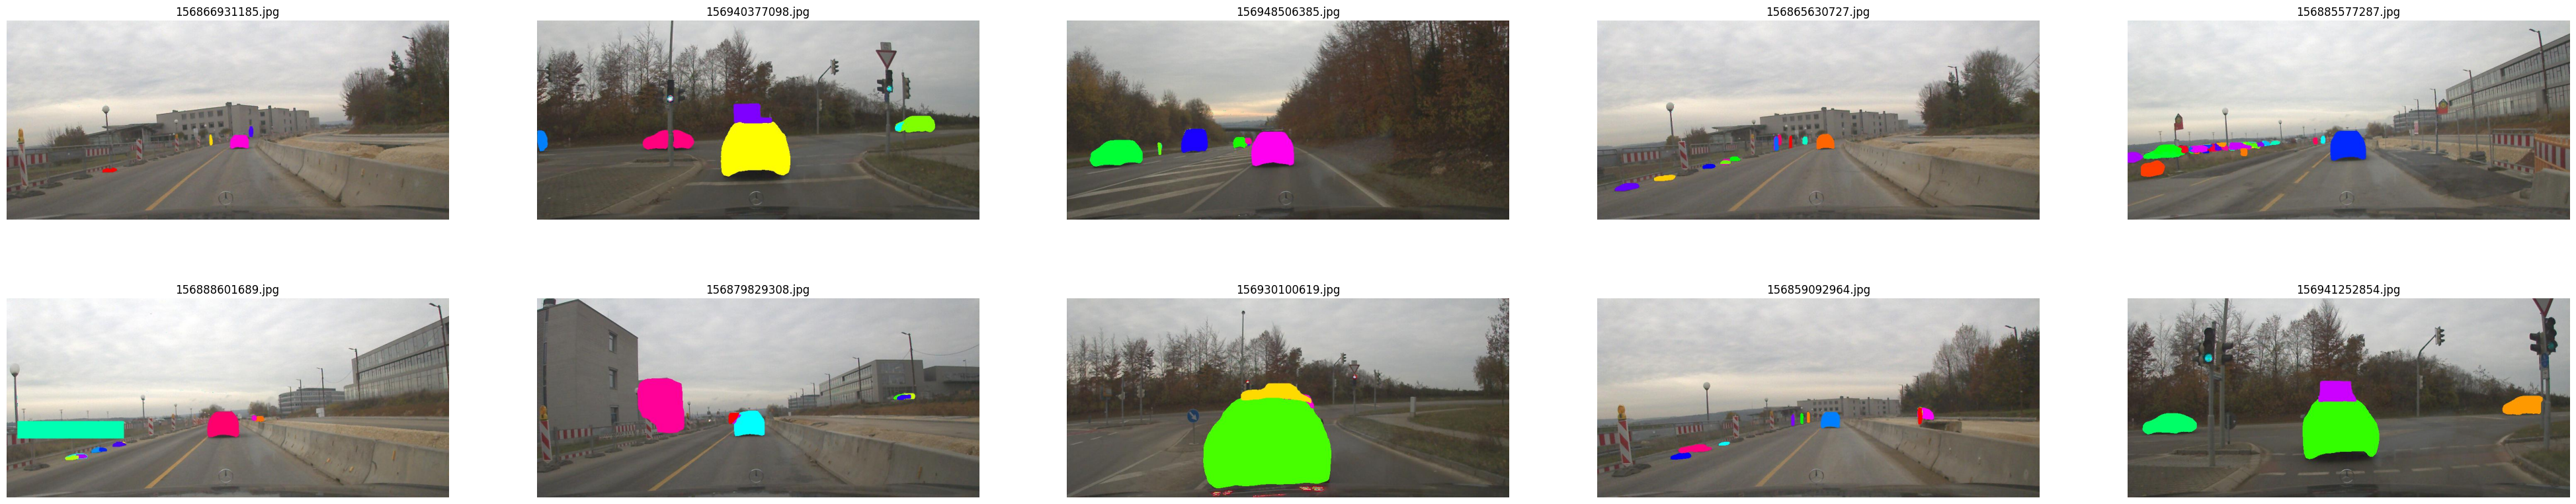

In [29]:
images_paths_dir = os.path.join(dir_path,"sequence_1/camera/")
images_paths = os.listdir(images_paths_dir)
plt.figure(figsize=(50,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    img = Image.open(os.path.join(images_paths_dir,images_paths[i]))
    plt.title(images_paths[i])
    plt.axis(False)
    plt.imshow(img)

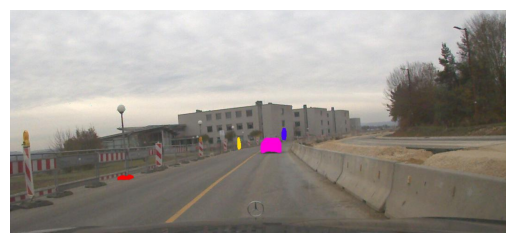

In [201]:
img = Image.open(os.path.join(images_paths_dir,images_paths[0]))
plt.axis(False)
plt.imshow(img)

# Analysing and Preprocessing the Scenes.json files


In [109]:
scenes_meta_data_dir = os.path.join(dir_path,"sequence_1")
scenes_meta_data = json.load(open(os.path.join(scenes_meta_data_dir,'scenes.json')))
print("Keys: ")
for i in list(scenes_meta_data.keys()):
    print(i)

Keys: 
sequence_name
category
first_timestamp
last_timestamp
scenes


In [181]:
def convert_to_pandas(json_data):
    df = []
    columns = [
        "Sequence_Name",
        "Category",
        "Sequence_ID",
        'sensor_id',
        'prev_timestamp',
        'next_timestamp',
        'prev_timestamp_same_sensor',
        'next_timestamp_same_sensor',
        'odometry_timestamp',
        'odometry_index',
        'image_name',
        'radar_indices'
    ]
    scene_names = list(json_data["scenes"].keys())
    for i in range(len(json_data["scenes"])):
        df_row = []
        df_row.append(json_data["sequence_name"])
        df_row.append(json_data["category"])
        df_row.append(scene_names[i])
        # print(list(json_data["scenes"][scene_names[i]].values()))
        df_row.extend(list(json_data["scenes"][scene_names[i]].values()))
        df.append(df_row)
        
    return pd.DataFrame(df,columns=columns)

def Get_Collated_df(dir_path=None):
    sequences_dir_path = r"D:\PAPERS\DIP2\New\RadarScenes\RadarScenes\data"
    dfs = []
    for sequence_name in os.listdir(sequences_dir_path):
        if ("_" in sequence_name):
            scenes_meta_data = json.load(open(os.path.join(os.path.join(sequences_dir_path,sequence_name),'scenes.json')))
            df = convert_to_pandas(scenes_meta_data)
            dfs.append(df)

    df = pd.concat(dfs,axis = 0)
    df = df.sort_values(by="Sequence_Name")
    df.reset_index(inplace=True)
    df.drop(['index'],axis=1)
    return df


In [189]:
df = Get_Collated_df()
df

,index,Sequence_Name,Category,Sequence_ID,sensor_id,prev_timestamp,next_timestamp,prev_timestamp_same_sensor,next_timestamp_same_sensor,odometry_timestamp,odometry_index,image_name,radar_indices
0,2058,sequence_1,train,156900996034,1,1.569009e+11,1.569010e+11,1.569009e+11,1.569011e+11,156900991602,4199,156901075079.jpg,"[198023, 198028]"
1,2531,sequence_1,train,156909885464,2,1.569099e+11,1.569099e+11,1.569098e+11,1.569100e+11,156909881670,5088,156910022871.jpg,"[289733, 289942]"
2,2530,sequence_1,train,156909863437,1,1.569098e+11,1.569099e+11,1.569098e+11,1.569099e+11,156909861624,5086,156910022871.jpg,"[289617, 289733]"
3,2529,sequence_1,train,156909848335,4,1.569098e+11,1.569099e+11,1.569098e+11,1.569099e+11,156909851632,5085,156910022871.jpg,"[289420, 289617]"
4,2528,sequence_1,train,156909834456,3,1.569098e+11,1.569098e+11,1.569098e+11,1.569099e+11,156909831601,5083,156910022871.jpg,"[289151, 289420]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
832817,1309,sequence_99,validation,22549375103768,4,2.254938e+13,2.254938e+13,2.254938e+13,2.254938e+13,22549375107854,2811,22549375027806.jpg,"[194471, 194668]"
832818,1310,sequence_99,validation,22549375104678,3,2.254938e+13,2.254938e+13,2.254938e+13,2.254938e+13,22549375107854,2811,22549375027806.jpg,"[194668, 194916]"
832819,1311,sequence_99,validation,22549375142756,1,2.254938e+13,2.254938e+13,2.254938e+13,2.254938e+13,22549375137861,2814,22549375027806.jpg,"[194916, 195103]"
832820,1302,sequence_99,validation,22549374953313,3,2.254937e+13,2.254937e+13,2.254937e+13,2.254938e+13,22549374957853,2796,22549375027806.jpg,"[193108, 193353]"


In [197]:
print(" --- Dataset Statistics --- ")
print("Number of records: ", len(df))
print("Number of Training Records: ", df['Category'].value_counts()['train'])
print("Number of Validation Records: ", df['Category'].value_counts()['validation'])
print("Number of Sensors used: ", len(df['sensor_id'].value_counts()))

 --- Dataset Statistics --- 
Number of records:  832822
Number of Training Records:  694880
Number of Validation Records:  137942
Number of Sensors used:  4
